<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Blocks-with-crimes" data-toc-modified-id="Blocks-with-crimes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Blocks with crimes</a></span><ul class="toc-item"><li><span><a href="#Create-dataset-with-only-one-observation-per-school-year-and-only-dummies" data-toc-modified-id="Create-dataset-with-only-one-observation-per-school-year-and-only-dummies-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Create dataset with only one observation per school year and only dummies</a></span></li></ul></li><li><span><a href="#Routes" data-toc-modified-id="Routes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Routes</a></span></li><li><span><a href="#Hourly-crime-counts" data-toc-modified-id="Hourly-crime-counts-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hourly crime counts</a></span></li></ul></li><li><span><a href="#Plot-blocks-with-dummies" data-toc-modified-id="Plot-blocks-with-dummies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot blocks with dummies</a></span></li><li><span><a href="#Plot-violent-crime-trends" data-toc-modified-id="Plot-violent-crime-trends-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot violent crime trends</a></span><ul class="toc-item"><li><span><a href="#Hourly-counts" data-toc-modified-id="Hourly-counts-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hourly counts</a></span></li></ul></li><li><span><a href="#DID-illustration-plot" data-toc-modified-id="DID-illustration-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DID illustration plot</a></span></li><li><span><a href="#Plot-blocks-coloured-by-status" data-toc-modified-id="Plot-blocks-coloured-by-status-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot blocks coloured by status</a></span></li></ul></div>

**Description**: Creates and saves additional figures for website.

---

In [1]:
import pickle
import sys
from pathlib import Path

import altair as alt
import geopandas as gpd
import ipywidgets as widgets
import pandas as pd
import numpy as np

sys.path.append('../..')
from src.analysis.figures import format_chart, save_to_jekyll
from src.prepare_data.crime_database import load_relevant_crimes

Only run next cell once if you use Jupyter notebook. Not necessary for Jupyter lab.

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Care with this setting. `max_rows=None` should only be used when exporting to html. Don't display large figures in this notebook!

In [3]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

Set path to data folder

In [4]:
data_path = Path('../../data')

# Load data

## Blocks with crimes
This dataset contains an observation per block per school year

In [5]:
with (data_path / 'processed/figures/blocks_with_dummies.pkl').open('rb') as f:
    blocks_dummies = pickle.load(f)
blocks_dummies = blocks_dummies[['tract_bloc', 'school_year', 'info']]
assert not blocks_dummies.duplicated(subset=['tract_bloc', 'school_year']).any()
blocks_dummies.head()

,tract_bloc,school_year,Date,violent_count,property_count,route_number,school_name,treated,one_over,two_over,three_over,info
0,101001000.0,SY0506,2006-01-31,0.0,0.0,NaN,NaN,0.0,0,0,0,-
1,101001000.0,SY0506,2006-02-28,0.0,0.0,NaN,NaN,0.0,0,0,0,-
2,101001000.0,SY0506,2006-03-31,0.0,0.0,NaN,NaN,0.0,0,0,0,-
3,101001000.0,SY0506,2006-04-30,0.0,0.0,NaN,NaN,0.0,0,0,0,-
4,101001000.0,SY0506,2006-05-31,0.0,1.0,NaN,NaN,0.0,0,0,0,-


## Routes

In [7]:
with (data_path / 'processed/routes.pkl').open('rb') as f:
    routes = pickle.load(f)
routes.head()

,school_name,school_id,school_year,route_number,geometry
0,Bass,609791,SY1516,26,(LINESTRING (-87.65435458421847 41.77415375372...
1,Haley,609808,SY1516,21,(LINESTRING (-87.63829660445114 41.67785424533...
2,Wentworth,610223,SY1516,22,(LINESTRING (-87.66139078533355 41.76494287260...
3,Mays,610290,SY1516,23,(LINESTRING (-87.64702376241898 41.77243973026...
4,Nicholson Tech Acad,609793,SY1516,24,(LINESTRING (-87.65473745700072 41.78870650844...


## Hourly crime counts

In [8]:
with (data_path / 'processed/figures/violent_hourly_counts.pkl').open('rb') as f:
    hourly_counts = pickle.load(f)

# Plot blocks with dummies

In [9]:
dummy_trend = blocks_dummies.groupby('school_year')['info'].apply(
    lambda x: x.value_counts()).reset_index().rename(
        {
            'level_1': 'block_status',
            'info': 'count'
        }, axis='columns').query('block_status != "-"')

dummy_trend['block_status'] = dummy_trend['block_status'].map({
    'treated':
    'Treated',
    'one over':
    'One over',
    'two over':
    'Two over',
    'three over':
    'Three over'
})

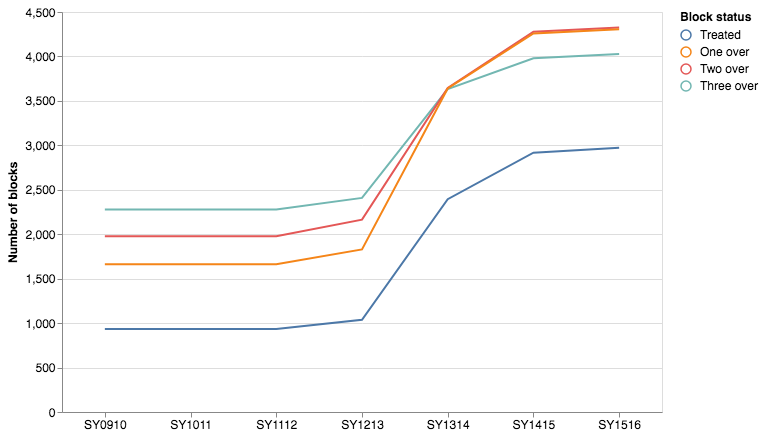

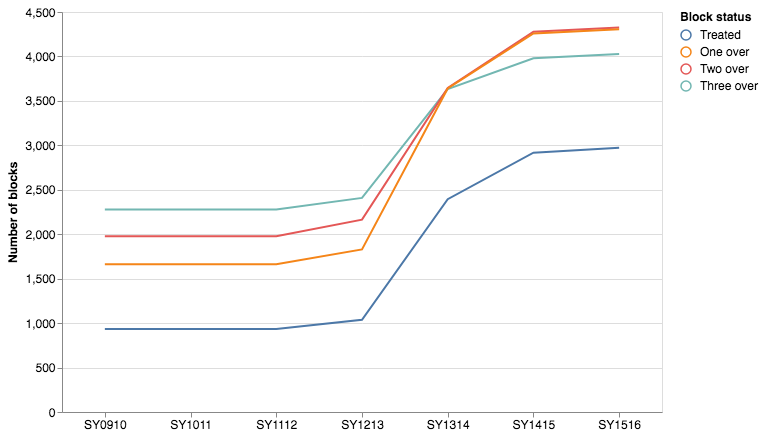

In [10]:
block_trend = format_chart(
    alt.Chart(dummy_trend).mark_line().encode(
        alt.X('school_year:O', axis=alt.Axis(labelAngle=0, title='')),
        alt.Y('count:Q', axis=alt.Axis(title='Number of blocks')),
        alt.Color(
            'block_status:N',
            sort=['Treated', 'One over', 'Two over', 'Three over'],
            legend=alt.Legend(title='Block status'))).properties(width=600))
block_trend

In [11]:
save_to_jekyll(block_trend, 'block_trend')

# Plot violent crime trends

## Hourly counts

Won't display this figure as it is too large for the notebook.

Color scheme will be reversed by `save_to_jekyll` function.

In [12]:
single = alt.selection_single(on='click', encodings=['x'])

left = alt.Chart().mark_rect().encode(
    x=alt.X(
        'Date:O', timeUnit='year', axis=alt.Axis(title='Year',
                                                 labelAngle=-60)),
    y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
    color=alt.condition(single, alt.Color('mean(count):Q',
    scale=alt.Scale(scheme='redyellowgreen')),
                      alt.value('lightgray'))).properties(selection=single)

right = alt.Chart().mark_rect().encode(
    x=alt.X(
        'Date:O',
        timeUnit='hours',
        axis=alt.Axis(title='Hour of Day', labelAngle=-60)),
    y=alt.Y('Date:O', timeUnit='month', axis=alt.Axis(title='Month')),
    color=alt.Color('mean(count):Q', 
                    scale=alt.Scale(scheme='redyellowgreen')),
).transform_filter(single)

violent_trend = alt.hconcat(
    left,
    right,
    data=hourly_counts.query('violent == 1'),
    resolve=alt.Resolve(
        scale=alt.LegendResolveMap(color=alt.ResolveMode('independent'))))

In [13]:
save_to_jekyll(violent_trend, 'violent_trend', reverse_colors=True)

# DID illustration plot
TODO: This would need to be finished if used on website.

In [24]:
did_data = pd.DataFrame.from_dict({
    'time': ['Before treatment', 'After treatment'] * 2,
    'crime_count': [5, 3, 2, 1],
    'Group': ['Treatment', 'Treatment', 'Control', 'Control']
})

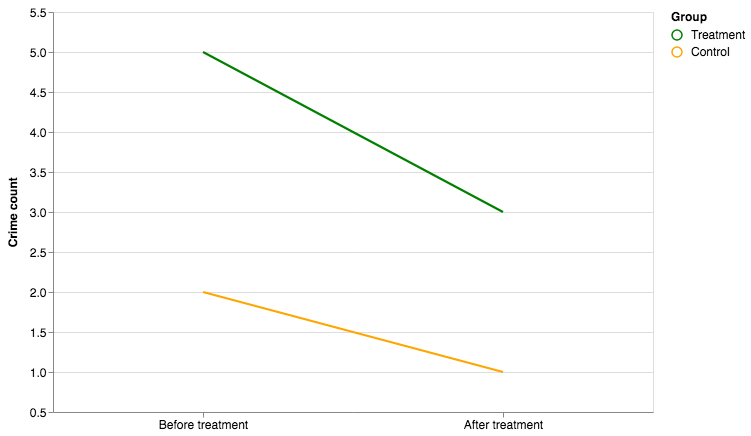

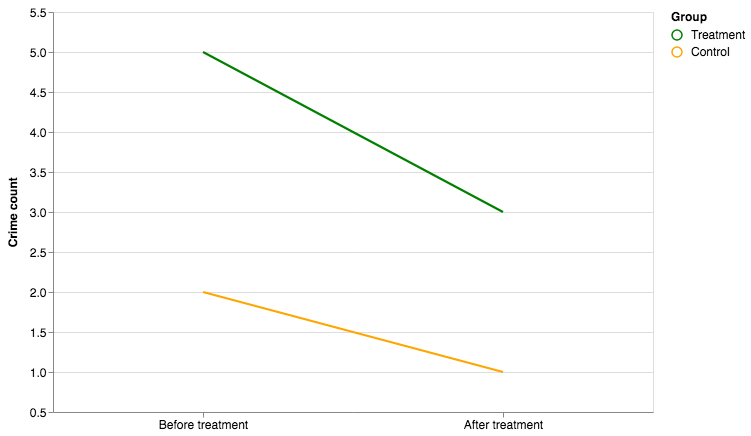

In [35]:
format_chart(alt.Chart(did_data).mark_line().encode(
    alt.X('time:O', axis=alt.Axis(title='', labelAngle=0), sort=['Before treatment', 'After treatment']),
    alt.Y('crime_count:Q', axis=alt.Axis(title='Crime count'),
         scale=alt.Scale(domain=[0.5, 5.5])),
    alt.Color('Group:N', title='Group', sort=['Treatment', 'Control'],
             scale=alt.Scale(domain=['Treatment', 'Control'],
                            range=['green', 'orange']))))

# Plot blocks coloured by status
Let's do it for school years SY1112 onwards as for the first three school years treatment and therefore also the other dummies are constant.

In [14]:
def df_to_json(plot_df, f_name):
    """Saves a geopandas dataframe to json"""
    assert isinstance(plot_df, gpd.GeoDataFrame)
    f_name = f_name.replace('.json', '')
    with Path(f'0_interim_data/{f_name}.json').open('w') as f:
        json.dump(json.loads(plot_df.to_json())['features'], f)
    return


def save_plot_dataframe(df, sy, prefix):
    """Saves dataframe for plotting for one school year
    
    Parameters
    ----------
    sy : str, format='SY1213'
        School year of which data should be saved
    
    Returns
    -------
    Nothing
    """
    # Extract relevant information for given school year
    temp_df = df.query('school_year == @sy').drop('school_year', axis='columns')
    
    # Save to disk
    df_to_json(temp_df, f'{prefix}_{sy}')
    return

In [15]:
sy_to_plot = ['SY1213', 'SY1314', 'SY1415', 'SY1516']

Save blocks

In [16]:
blocks_temp = blocks[[
        'tract_bloc', 'school_year', 'info', 'geometry'
    ]].rename({'info': 'block_status'}, axis='columns')

for sy in sy_to_plot:
    print(sy)
    save_plot_dataframe(blocks_temp, sy, 'plot_blocks')

NameError: name 'blocks' is not defined

Save routes

In [60]:
sorted(routes['school_year'].unique())

['SY1314', 'SY1415', 'SY1516', 'SY1617', 'SY1718']

In [64]:
routes_temp = routes[['school_name', 'school_year', 'geometry']]

# Leave away SY1213 as no data on exact geometries for routes
for sy in sy_to_plot[1:]:
    save_plot_dataframe(routes_temp, sy, 'plot_routes')

In [65]:
def make_tab(tab_titles, alt_charts):
    """Plots each provided Altair chart in own tab
    
    Parameters
    ----------
    tab_titles : list of str
        Contains a title for each tab
        
    alt_charts : list of Altair charts
        Contains all Altair charts which should be plotted
        Needs to be of same length as tab_titles
        
    Returns
    -------
    ipywidgets.widgets.Tab
        Tab instance with set titles and rendered charts
        Ready for display
    """
    # Create Output widgets
    outputs = []
    for i in range(len(tab_titles)):
        outputs.append(widgets.Output())
    # Add outputs to Tab instance
    tab = widgets.Tab()
    tab.children = outputs
    # Set tab titles
    for i, title in enumerate(tab_titles):
        tab.set_title(i, title)
    # Add Altair charts
    for i, out in enumerate(outputs):
        with out:
            alt_charts[i].display()
    return tab

In [66]:
tab_charts = []
for sy in sy_to_plot:
    block_chart_temp = alt.Chart(
    f'0_interim_data/plot_blocks_{sy}.json').mark_geoshape().encode(
        alt.Color(
            'properties.block_status:N',
            scale=alt.Scale(scheme='viridis'),
#             sort=[
#                 'Treated', 'One block over', 'Two blocks over',
#                 'Three blocks over', '-'
#             ],
            legend=alt.Legend(title='Block status')))

    routes_chart_temp = alt.Chart(f'0_interim_data/plot_routes_{sy}.json').mark_geoshape().encode(
        color=alt.value('red'))
    
    tab_charts.append((block_chart_temp + routes_chart_temp).properties(width=800, height=1200))

make_tab(sy_to_plot, tab_charts)